## Trực quan hóa dữ liệu

## Mục lục
- [I. Tiền xử lí để trực quan](#i)
- [II. Đặt câu hỏi có ý nghĩa và trả lời bằng trực quan](#ii)
    - [1. Vấn đề 1: Salary (Lương)](#ii1)
        - [1.1 Câu hỏi 1](#ii1a)
        - [1.2 Câu hỏi 2](#ii1b)
        - [1.3 Câu hỏi 3](#ii1c)
        - [1.4 Câu hỏi 4](#ii1d)
    - [2. Vấn đề 2: Xu hướng tuyển dụng](#ii2)
        - [2.1 Câu hỏi 1](#ii2a)
        - [2.2 Câu hỏi 2](#ii2b)
    - [3. Vấn đề 3: Welfare (Phúc lợi)](#ii3)
        - [3.1 Câu hỏi 1](#ii3a)
        - [3.2 Câu hỏi 2](#ii3b)
        - [3.3 Câu hỏi 3](#ii3c)
        - [3.4 Câu hỏi 4](#ii3d)
- [Tài liệu tham khảo](#tl)

## I. Tiền xử lí để trực quan <a id="i"></a>

In [1]:
# Các thư viện sử dụng:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
import csv

from sklearn.linear_model import LinearRegression

In [2]:
# Đọc file csv
df = pd.read_csv('data_for_visual.csv')
df.head()

,Job Name,Job Link,Location,Update Date,Deadline,Experience,Job Level,Industry,Employment Type,Welfare,...,Company Type,Update Date_day,Update Date_month,Update Date_year,Deadline_day,Deadline_month,Deadline_year,Language requirement,Education Levels,Gender Requirement
0,Warehouse Supervisor,https://careerviet.vn/vi/tim-viec-lam/warehous...,Binh Đinh,2024-10-25,2024-11-23,2,Trưởng nhóm / Giám sát,"manufacturing_operations,wooden_goods,procurem...",Official,"laptop, insurance, travel, allowance, shuttle_...",...,Trách nhiệm hữu hạn,25,10,2024,23,11,2024,1,4,both
1,Nhân viên Môi giới,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Ha Noi,2024-10-25,2024-11-23,1,Nhân viên,"insurance,securities,customer_service",Official,"insurance, travel, bonus, healthcare, training...",...,Cổ phần,25,10,2024,23,11,2024,0,4,both
2,Nhân Viên Thống Kê,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Hai Duong,2024-10-25,2024-11-23,0,Nhân viên,"accounting_auditing,statistics",Official,"laptop, insurance, travel, allowance, overseas...",...,Cổ phần,25,10,2024,23,11,2024,0,2,both
3,Giám đốc Quan hệ khách hàng Tín dụng - RB - MS...,https://careerviet.vn/vi/tim-viec-lam/giam-doc...,An Giang,2024-10-25,2024-11-23,5,Quản lý,"customer_service,banking,finance_investment",Official,"insurance, travel, bonus, healthcare, training...",...,Cổ phần,25,10,2024,23,11,2024,0,4,both
4,Nhân viên kỹ thuật tòa nhà (Chấp nhận SV mới r...,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Ha Noi,2024-11-24,2024-12-23,0,Nhân viên,"electricity_electronics_refrigeration,maintena...",Official,"insurance, travel, allowance, overseas_travel,...",...,Cổ phần,24,11,2024,23,12,2024,0,2,male


In [3]:
# Danh sách 63 tỉnh/thành phố của Việt Nam
valid_locations = [
    "An Giang", "Bà Rịa - Vũng Tàu", "Bạc Liêu", "Bắc Kạn", "Bắc Giang", "Bắc Ninh",
    "Bến Tre", "Bình Dương", "Bình Định", "Bình Phước", "Bình Thuận", "Cà Mau",
    "Cần Thơ", "Cao Bằng", "Đà Nẵng", "Đắk Lắk", "Đắk Nông", "Điện Biên",
    "Đồng Nai", "Đồng Tháp", "Gia Lai", "Hà Giang", "Hà Nam", "Hà Nội", "Hà Tĩnh",
    "Hải Dương", "Hải Phòng", "Hòa Bình", "Hậu Giang", "Hoà Bình", "Hồ Chí Minh",
    "Hưng Yên", "Khánh Hòa", "Kiên Giang", "Kon Tum", "Lai Châu", "Lạng Sơn",
    "Lào Cai", "Long An", "Nam Định", "Nghệ An", "Ninh Bình", "Ninh Thuận",
    "Phú Thọ", "Phú Yên", "Quảng Bình", "Quảng Nam", "Quảng Ngãi", "Quảng Ninh",
    "Quảng Trị", "Sóc Trăng", "Sơn La", "Tây Ninh", "Thái Bình", "Thái Nguyên",
    "Thanh Hóa", "Thừa Thiên - Huế", "Tiền Giang", "Trà Vinh", "Tuyên Quang",
    "Vĩnh Long", "Vĩnh Phúc", "Yên Bái"
]

In [4]:
# In ra cột 'Location' của dataframe
print(df['Location'].unique())

['Binh Đinh' 'Ha Noi' 'Hai Duong' 'An Giang' 'Long An' 'Ho Chi Minh'
 'Quang Ninh' 'Đa Nang' 'Binh Duong' 'Quang Ngai' 'Đong Nai' 'Hung Yen'
 'Vinh Long' 'Ha Nam' 'Lam Đong' 'Can Tho' 'Dak Lak' 'Gia Lai' 'Khanh Hoa'
 'Bac Giang' 'Binh Thuan' 'Tay Ninh' 'Ba Ria - Vung Tau' 'Tien Giang'
 'Thai Binh' 'Bac Lieu' 'Thanh Hoa' 'Bac Ninh' 'Tra Vinh' 'Ninh Thuan'
 'Hoa Binh' 'Binh Phuoc' 'Hai Phong' 'Kien Giang' 'Cao Bang' 'Yen Bai'
 'Hau Giang' 'Vinh Phuc' 'Ha Giang' 'Tuyen Quang' 'Đien Bien' 'Nam Đinh'
 'Lang Son' 'Kv Đong Nam Bo' 'Nghe An' 'Quang Tri' 'Đong Thap' 'Quang Nam'
 'Thua Thien- Hue' 'Toan Quoc' 'Phu Yen' 'Quang Binh' 'Vientiane'
 'Phu Tho' 'Svay Rieng' 'Ninh Binh' 'Thai Nguyen' 'Bac Can' 'Son La'
 'Ha Tinh' 'Ben Tre' 'Ca Mau' 'Kv Tay Nguyen' 'Lao Cai' 'Soc Trang'
 'Dak Nong' 'Khac' 'Attapeu' 'Đong Bang Song Cuu Long' 'Quoc Te' 'Kon Tum'
 'Tokyo' 'Xiangkhouang' 'Champasak' 'Yokohama' 'Hokkaido' 'Malaysia'
 'Kv Bac Trung Bo' 'Bangkok' 'Kv Nam Trung Bo' 'Lai Chau' 'Phnompenh'
 'Krati

In [5]:
# Tạo từ điển ánh xạ tên địa điểm sang tiếng Việt chuẩn
city_to_vietnamese = {
    "Hai Duong": "Hải Dương",
    "Long An": "Long An",
    "Ha Noi": "Hà Nội",
    "Ho Chi Minh": "Thành phố Hồ Chí Minh",
    "Binh Duong": "Bình Dương",
    "Đong Nai": "Đồng Nai",
    "Quang Ngai": "Quảng Ngãi",
    "Vinh Long": "Vĩnh Long",
    "Lam Đong": "Lâm Đồng",
    "Can Tho": "Cần Thơ",
    "Bac Ninh": "Bắc Ninh",
    "Dak Lak": "Đắk Lắk",
    "Gia Lai": "Gia Lai",
    "Bac Giang": "Bắc Giang",
    "Binh Thuan": "Bình Thuận",
    "Tay Ninh": "Tây Ninh",
    "Ba Ria - Vung Tau": "Bà Rịa - Vũng Tàu",
    "Ha Nam": "Hà Nam",
    "Thai Binh": "Thái Bình",
    "Bac Lieu": "Bạc Liêu",
    "Thanh Hoa": "Thanh Hóa",
    "Binh Đinh": "Bình Định",
    "Tra Vinh": "Trà Vinh",
    "Hoa Binh": "Hòa Bình",
    "Đa Nang": "Đà Nẵng",
    "Hung Yen": "Hưng Yên",
    "Hai Phong": "Hải Phòng",
    "Kien Giang": "Kiên Giang",
    "Vinh Phuc": "Vĩnh Phúc",
    "Ha Giang": "Hà Giang",
    "Tuyen Quang": "Tuyên Quang",
    "Đien Bien": "Điện Biên",
    "Nam Dinh": "Nam Định",
    "Lang Son": "Lạng Sơn",
    "Nghe An": "Nghệ An",
    "Quang Tri": "Quảng Trị",
    "Quang Ninh": "Quảng Ninh",
    "Ninh Thuan": "Ninh Thuận",
    "Đong Thap": "Đồng Tháp",
    "Quang Nam": "Quảng Nam",
    "Thua Thien- Hue": "Thừa Thiên - Huế",
    "Tien Giang": "Tiền Giang",
    "Khanh Hoa": "Khánh Hòa",
    "Phu Yen": "Phú Yên",
    "Quang Binh": "Quảng Bình",
    "Hau Giang": "Hậu Giang",
    "Binh Phuoc": "Bình Phước",
    "Phu Tho": "Phú Thọ",
    "Ninh Binh": "Ninh Bình",
    "Thai Nguyen": "Thái Nguyên",
    "Bac Can": "Bắc Cạn",
    "Son La": "Sơn La",
    "Ha Tinh": "Hà Tĩnh",
    "Yen Bai": "Yên Bái",
    "Ca Mau": "Cà Mau",
    "An Giang": "An Giang",
    "Ben Tre": "Bến Tre",
    "Lao Cai": "Lào Cai",
    "Soc Trang": "Sóc Trăng",
    "Cao Bang": "Cao Bằng",
    "Dak Nong": "Đắk Nông",
    "Kon Tum": "Kon Tum",
    "Lai Chau": "Lai Châu",
    
    # Khu vực khác
    "Kv Đong Nam Bo": "Khu vực Đông Nam Bộ",
    "Kv Tay Nguyen": "Khu vực Tây Nguyên",
    "Kv Nam Trung Bo": "Khu vực Nam Trung Bộ",
    "Kv Bac Trung Bo": "Khu vực Bắc Trung Bộ",
    "Đong Bang Song Cuu Long": "Đồng Bằng Sông Cửu Long",
    "Toan Quoc": "Toàn Quốc",
    "Khac": "Khác",

    # Các địa điểm khác (được gộp chung vào "foreign city/province")
    "Svay Rieng": "foreign city/province",
    "Tokyo": "foreign city/province",
    "Xiangkhouang": "foreign city/province",
    "Champasak": "foreign city/province",
    "Yokohama": "foreign city/province",
    "Hokkaido": "foreign city/province",
    "Malaysia": "foreign city/province",

    "Bangkok": "foreign city/province",
    "Kratie": "foreign city/province",
    "Phnompenh": "foreign city/province"
}
df['City'] = df['Location']
df['Location'] = df['Location'].map(city_to_vietnamese).astype("category")
df['Location'].value_counts()

Location
Thành phố Hồ Chí Minh    6924
Hà Nội                   6221
Bình Dương                959
Đồng Nai                  696
Long An                   400
                         ... 
Khác                        8
Khu vực Bắc Trung Bộ        8
Khu vực Nam Trung Bộ        7
Khu vực Tây Nguyên          5
Lai Châu                    3
Name: count, Length: 70, dtype: int64

In [6]:
# Nhận thấy các dòng mang giá trị Toàn Quốc không mang ý nghĩa trong việc phân tích dữ liệu, nên ta sẽ loại bỏ các dòng này
df = df[df['Location'] != "Toàn Quốc"]

### Việt Nam được chia thành 3 miền và 8 vùng:

Source: [Địa lý Việt Nam](https://vi.wikipedia.org/wiki/%C4%90%E1%BB%8Ba_l%C3%BD_Vi%E1%BB%87t_Nam#C%C3%A1c_v%C3%B9ng_mi%E1%BB%81n).

Bắc Bộ:
- Tây Bắc Bộ
- Đông Bắc Bộ
- Đồng bằng sông Hồng

đôi khi 2 vùng Tây Bắc và Đông Bắc được gộp chung thành Trung du và miền núi phía Bắc

Trung Bộ:
- Bắc Trung Bộ
- Duyên hải Nam Trung Bộ
- Tây Nguyên

Nam Bộ:
- Đông Nam Bộ
- Đồng bằng sông 

In [7]:
# Tạo từ điển ánh xạ tỉnh/thành phố sang vùng
location_to_region = {
# miền Bắc Bộ
    # Tây Bắc Bộ
    "Hòa Bình": "Tây Bắc Bộ", 
    "Lào Cai": "Tây Bắc Bộ",
    "Yên Bái": "Tây Bắc Bộ",
    
    # Đông Bắc Bộ
    "Hà Giang": "Đông Bắc Bộ",
    "Cao Bằng": "Đông Bắc Bộ",
    "Bắc Cạn": "Đông Bắc Bộ",
    "Thái Nguyên": "Đông Bắc Bộ",
    "Lạng Sơn": "Đông Bắc Bộ",
    "Bắc Giang": "Đông Bắc Bộ",
    "Phú Thọ": "Đông Bắc Bộ",
    
    # Đồng bằng sông Hồng
    "Hà Nội": "Đồng bằng sông Hồng",
    "Hải Phòng": "Đồng bằng sông Hồng",
    "Nam Định": "Đồng bằng sông Hồng",
    "Hải Dương": "Đồng bằng sông Hồng",
    "Bắc Ninh": "Đồng bằng sông Hồng",
    "Hà Nam": "Đồng bằng sông Hồng",
    "Thái Bình": "Đồng bằng sông Hồng",
    "Ninh Bình": "Đồng bằng sông Hồng",
    "Bắc Ninh": "Đồng bằng sông Hồng",
    "Hưng Yên": "Đồng bằng sông Hồng",
    
# miền Trung Bộ
    # Bắc Trung Bộ
    "Thanh Hóa": "Bắc Trung Bộ",
    "Nghệ An": "Bắc Trung Bộ",
    "Hà Tĩnh": "Bắc Trung Bộ",
    "Quảng Bình": "Bắc Trung Bộ",
    "Quảng Trị": "Bắc Trung Bộ",
    "Thừa Thiên - Huế": "Bắc Trung Bộ",
    "Khu vực Bắc Trung Bộ": "Bắc Trung Bộ",

    # Duyên hải Nam Trung Bộ
    "Đà Nẵng": "Duyên hải Nam Trung Bộ",
    "Quảng Nam": "Duyên hải Nam Trung Bộ",
    "Quảng Ngãi": "Duyên hải Nam Trung Bộ",
    "Bình Định": "Duyên hải Nam Trung Bộ",
    "Phú Yên": "Duyên hải Nam Trung Bộ",
    "Khánh Hòa": "Duyên hải Nam Trung Bộ",
    "Ninh Thuận": "Duyên hải Nam Trung Bộ",
    "Bình Thuận": "Duyên hải Nam Trung Bộ",
    "Khu vực Nam Trung Bộ": "Duyên hải Nam Trung Bộ",
    
    # Tây Nguyên
    "Lâm Đồng": "Tây Nguyên",
    "Gia Lai": "Tây Nguyên",
    "Kon Tum": "Tây Nguyên",
    "Đắk Nông": "Tây Nguyên",
    "Đắk Lắk": "Tây Nguyên",
    "Khu vực Tây Nguyên": "Tây Nguyên",
    
# miền Nam Bộ
    # Đồng bằng sông Cửu Long
    "Long An": "Đồng bằng sông Cửu Long", 
    "Tiền Giang": "Đồng bằng sông Cửu Long",
    "Bến Tre": "Đồng bằng sông Cửu Long",
    "Bạc Liêu": "Đồng bằng sông Cửu Long",
    "Hậu Giang": "Đồng bằng sông Cửu Long",
    "Đồng Tháp": "Đồng bằng sông Cửu Long",
    "Đồng Bằng Sông Cửu Long": "Đồng bằng sông Cửu Long",
    
    # Đông Nam Bộ
    "Thành phố Hồ Chí Minh": "Đông Nam Bộ",
    "Bà Rịa - Vũng Tàu": "Đông Nam Bộ",
    "Bình Dương": "Đông Nam Bộ",
    "Bình Phước": "Đông Nam Bộ",
    "Đồng Nai": "Đông Nam Bộ",
    "Tây Ninh": "Đông Nam Bộ",
    "Khu vực Đông Nam Bộ": "Đông Nam Bộ",
    
    # Khu vực khác trong nước
    "Khác": "Khu vực khác trong nước",
    # Toàn quốc
    "Toàn Quốc": "Toàn Quốc",
    
    # Nước ngoài
    "foreign city/province": "Khu vực nước ngoài",
}

df['Region'] = df['Location'].map(location_to_region).astype("category")
df['Region'].value_counts()

Region
Đông Nam Bộ                8992
Đồng bằng sông Hồng        7108
Duyên hải Nam Trung Bộ      712
Đồng bằng sông Cửu Long     618
Bắc Trung Bộ                348
Tây Nguyên                  251
Đông Bắc Bộ                 200
Tây Bắc Bộ                   82
Khu vực nước ngoài           16
Khu vực khác trong nước       8
Name: count, dtype: int64

In [8]:
# Tạo từ điển ánh xạ tỉnh/thành phố sang miền
location_to_domain = {
    # miền Bắc Bộ
    "Hòa Bình": "Bắc Bộ", 
    "Lào Cai": "Bắc Bộ",
    "Yên Bái": "Bắc Bộ",
    "Hà Giang": "Bắc Bộ",
    "Cao Bằng": "Bắc Bộ",
    "Bắc Cạn": "Bắc Bộ",
    "Thái Nguyên": "Bắc Bộ",
    "Lạng Sơn": "Bắc Bộ",
    "Bắc Giang": "Bắc Bộ",
    "Phú Thọ": "Bắc Bộ",
    "Hà Nội": "Bắc Bộ",
    "Hải Phòng": "Bắc Bộ",
    "Nam Định": "Bắc Bộ",
    "Hải Dương": "Bắc Bộ",
    "Bắc Ninh": "Bắc Bộ",
    "Hà Nam": "Bắc Bộ",
    "Thái Bình": "Bắc Bộ",
    "Ninh Bình": "Bắc Bộ",
    "Bắc Ninh": "Bắc Bộ",
    "Hưng Yên": "Bắc Bộ",
    
    # miền Trung Bộ
    "Thanh Hóa": "Trung Bộ",
    "Nghệ An": "Trung Bộ",
    "Hà Tĩnh": "Trung Bộ",
    "Quảng Bình": "Trung Bộ",
    "Quảng Trị": "Trung Bộ",
    "Thừa Thiên - Huế": "Trung Bộ",
    "Đà Nẵng": "Trung Bộ",
    "Quảng Nam": "Trung Bộ",
    "Quảng Ngãi": "Trung Bộ",
    "Bình Định": "Trung Bộ",
    "Phú Yên": "Trung Bộ",
    "Khánh Hòa": "Trung Bộ",
    "Ninh Thuận": "Trung Bộ",
    "Bình Thuận": "Trung Bộ",
    "Khu vực Nam Trung Bộ": "Trung Bộ",
    "Lâm Đồng": "Trung Bộ",
    "Gia Lai": "Trung Bộ",
    "Kon Tum": "Trung Bộ",
    "Đắk Nông": "Trung Bộ",
    "Đắk Lắk": "Trung Bộ",
    "Khu vực Tây Nguyên": "Trung Bộ",
    
    # miền Nam Bộ
    "Long An": "Nam Bộ", 
    "Tiền Giang": "Nam Bộ",
    "Bến Tre": "Nam Bộ",
    "Bạc Liêu": "Nam Bộ",
    "Hậu Giang": "Nam Bộ",
    "Đồng Tháp": "Nam Bộ",
    "Đồng Bằng Sông Cửu Long": "Nam Bộ",
    "Thành phố Hồ Chí Minh": "Nam Bộ",
    "Bà Rịa - Vũng Tàu": "Nam Bộ",
    "Bình Dương": "Nam Bộ",
    "Bình Phước": "Nam Bộ",
    "Đồng Nai": "Nam Bộ",
    "Tây Ninh": "Nam Bộ",
    "Khu vực Đông Nam Bộ": "Nam Bộ",
    
    # Khu vực khác trong nước
    "Khác": "Khu vực khác trong nước",
    # Toàn quốc
    "Toàn Quốc": "Toàn Quốc",
    
    # Nước ngoài
    "foreign city/province": "Khu vực nước ngoài",
}

df['Domain'] = df['Location'].map(location_to_domain).astype("category")
df['Domain'].value_counts()

Domain
Nam Bộ                     9610
Bắc Bộ                     7390
Trung Bộ                   1303
Khu vực nước ngoài           16
Khu vực khác trong nước       8
Name: count, dtype: int64

## II. Đặt câu hỏi có ý nghĩa và trả lời bằng trực quan <a id="ii"></a>

### 1. Vấn đề 1: Salary (Lương) <a id="ii1"></a>

Phân tích mức lương và các yếu tố ảnh hưởng đến nó

#### 1.1 Câu hỏi 1 <a id="ii1a"></a>

Mức lương trung bình theo các vùng ở Việt Nam là bao nhiêu?

In [9]:
# Chọn các dòng không mang giá trị 'Cạnh tranh' trong cột 'Salary' để phân tích và tạo bản sao
df_salary_defined = df[df['Salary'] != 'Cạnh tranh'].copy()

# Ép kiểu cột 'Salary' sang kiểu dữ liệu số
df_salary_defined['Salary'] = df_salary_defined['Salary'].astype(float)

In [10]:
# Lấy lương thấp nhất của các tỉnh
min_salary = df_salary_defined.groupby('Location', observed=True)['Salary'].min().sort_values()
min_salary.value_counts()

Salary
7500000.0     20
8000000.0      7
7000000.0      6
6000000.0      4
6500000.0      4
9000000.0      3
12500000.0     2
11000000.0     2
10500000.0     2
1000000.0      2
14000000.0     2
3500000.0      2
3000000.0      2
2000000.0      2
5800000.0      1
8200000.0      1
8500000.0      1
10000000.0     1
2800000.0      1
12000000.0     1
12200000.0     1
1200000.0      1
900000.0       1
Name: count, dtype: int64

In [11]:
# Lấy lương cao nhất của các tỉnh
max_salary = df_salary_defined.groupby('Location', observed=True)['Salary'].max()
max_salary = max_salary.sort_values(ascending=False)
max_salary.value_counts()

Salary
7.800000e+07    5
5.000000e+07    5
3.500000e+07    5
2.880000e+07    4
4.850000e+07    3
2.000000e+07    3
4.250000e+07    2
3.750000e+07    2
1.880000e+07    2
4.950000e+07    2
9.000000e+07    2
2.250000e+07    2
3.000000e+07    2
2.800000e+07    2
4.000000e+07    1
4.500075e+11    1
2.750000e+07    1
4.200000e+07    1
2.150000e+07    1
2.100000e+07    1
1.780000e+07    1
1.750000e+07    1
1.550000e+07    1
2.500000e+07    1
4.750000e+07    1
4.350000e+07    1
7.600000e+07    1
6.000000e+08    1
5.000000e+08    1
1.500000e+08    1
1.150000e+08    1
1.065000e+08    1
9.250000e+07    1
7.000000e+07    1
3.000000e+09    1
6.500000e+07    1
6.000000e+07    1
5.500000e+07    1
5.450000e+07    1
5.150000e+07    1
5.100000e+07    1
1.250000e+07    1
Name: count, dtype: int64

In [12]:
# Xóa các giá trị ngoại lai của cột Salary bằng tứ phân vị
Q1 = df_salary_defined['Salary'].quantile(0.25)
Q3 = df_salary_defined['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giá trị ngoại lai
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Đếm số lượng giá trị ngoại lai
outliers = df_salary_defined[(df_salary_defined['Salary'] < lower_bound) | (df_salary_defined['Salary'] > upper_bound)]
print(outliers.shape)

# Lọc bỏ các giá trị ngoại lai
df_salary_defined = df_salary_defined[(df_salary_defined['Salary'] >= lower_bound) & (df_salary_defined['Salary'] <= upper_bound)]

(890, 26)


In [13]:
# Tính toán mức lương trung bình theo Location và Job Level
avg_salary = df_salary_defined.groupby(['Region'], observed=True)['Salary'].mean().reset_index()
avg_salary.rename(columns={'Salary': 'Average Salary'}, inplace=True)
print("\nMức lương trung bình theo vùng và cấp bậc công việc:")
print(avg_salary)


Mức lương trung bình theo vùng và cấp bậc công việc:
                    Region  Average Salary
0             Bắc Trung Bộ    1.387529e+07
1   Duyên hải Nam Trung Bộ    1.261123e+07
2  Khu vực khác trong nước    1.360000e+07
3       Khu vực nước ngoài    1.544000e+07
4               Tây Bắc Bộ    1.490500e+07
5               Tây Nguyên    1.282417e+07
6              Đông Bắc Bộ    1.421679e+07
7              Đông Nam Bộ    1.439407e+07
8  Đồng bằng sông Cửu Long    1.445815e+07
9      Đồng bằng sông Hồng    1.453525e+07


Trực quan hóa

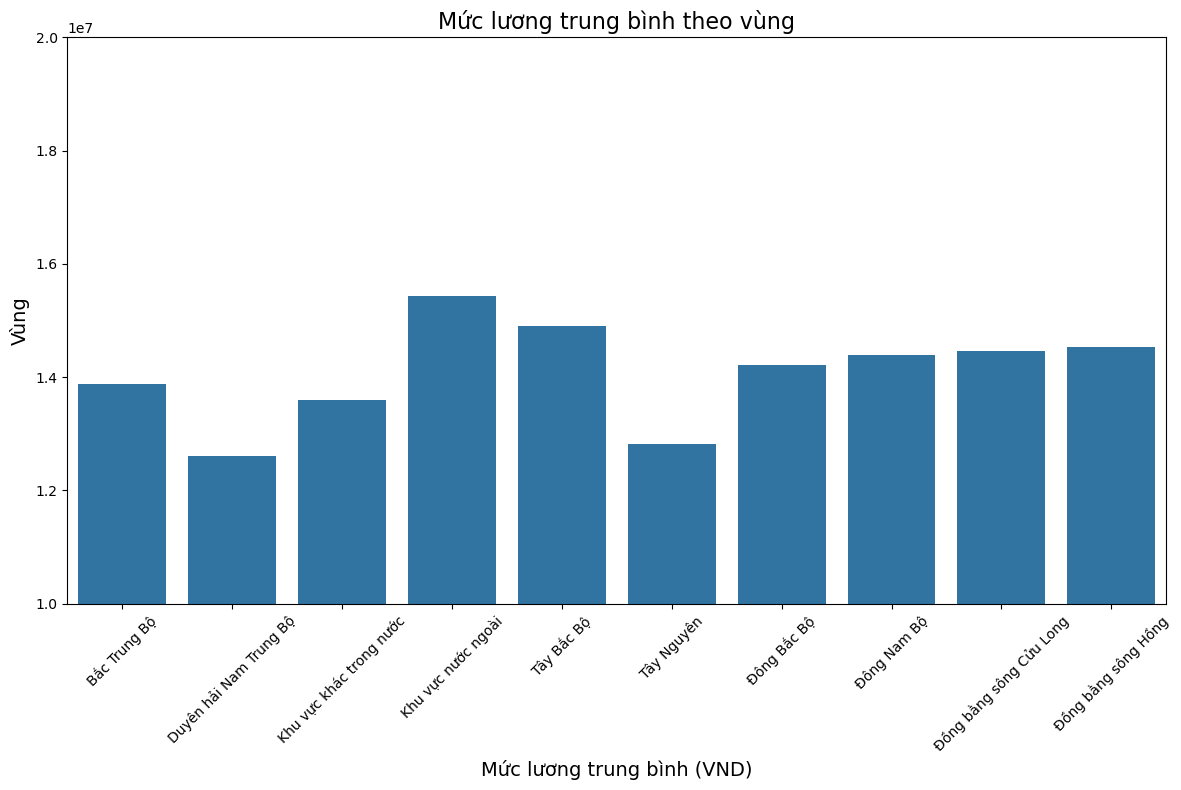

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_salary,
    y='Average Salary',
    x='Region',
)
plt.title('Mức lương trung bình theo vùng', fontsize=16)
plt.ylabel('Vùng', fontsize=14)
plt.xlabel('Mức lương trung bình (VND)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(10000000, 20000000)
plt.tight_layout()
plt.show()

Nhận xét:


#### 1.2 Câu hỏi 2 <a id="ii1b"></a>

Mức lương trung bình theo ngành nghề và cấp bậc là bao nhiêu?

In [15]:
# Xử lý cột 'Industry': Trong cột Industry, một công việc tuyển dụng có thể thuộc nhiều ngành nghề khác nhau, tách các ngành nghề ra thành các dòng riêng biệt bằng dấu phẩy
# Tách các ngành nghề bằng dấu phẩy thành danh sách
df_salary_defined['Industry'] = df_salary_defined['Industry'].str.split(',')

# Chuyển đổi các danh sách thành các dòng riêng biệt
df_salary_defined = df_salary_defined.explode('Industry')

# Loại bỏ khoảng trắng dư thừa (nếu có) và đảm bảo các tên ngành nghề không có lỗi chính tả
df_salary_defined['Industry'] = df_salary_defined['Industry'].str.strip()

# Tính mức lương trung bình theo ngành nghề
avg_salary_industry = df_salary_defined.groupby('Industry')['Salary'].mean().reset_index()
avg_salary_industry.rename(columns={'Salary': 'Average_Salary'}, inplace=True)

# Tính mức lương trung bình theo cấp bậc
avg_salary_job_level = df_salary_defined.groupby('Job Level')['Salary'].mean().reset_index()
avg_salary_job_level.rename(columns={'Salary': 'Average_Salary'}, inplace=True)

Trực quan hóa

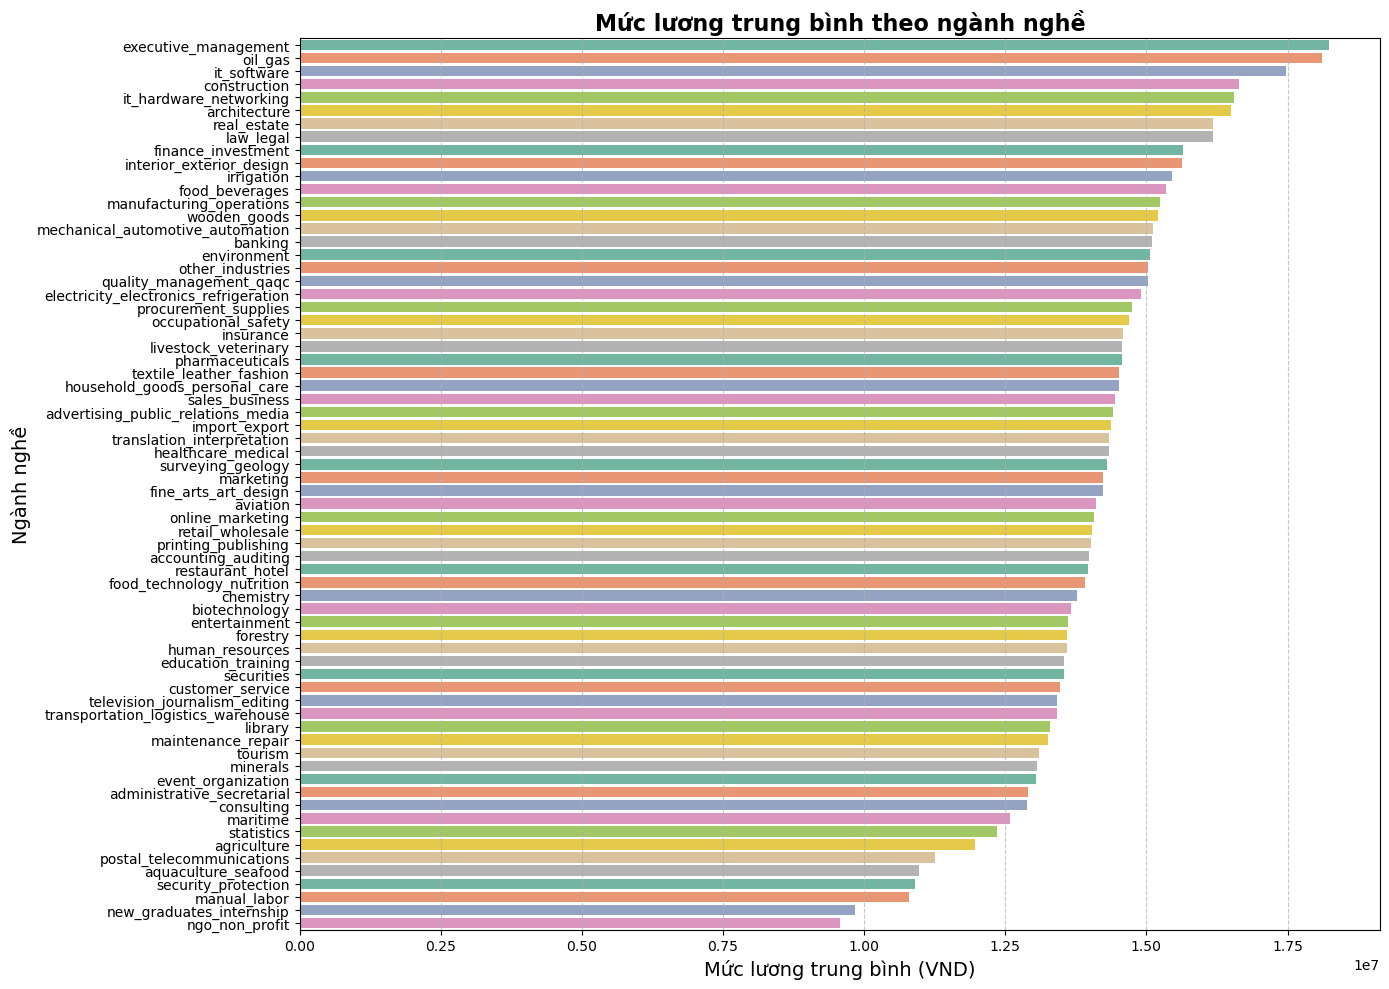

In [16]:
# Mức lương trung bình theo ngành nghề
plt.figure(figsize=(14, 10))
sns.set_palette('Set2')
sns.barplot(
    data=avg_salary_industry.sort_values('Average_Salary', ascending=False),
    x='Average_Salary',
    y='Industry',
    hue='Industry',
    palette='Set2'
)
plt.legend([], [], frameon=False)

plt.title('Mức lương trung bình theo ngành nghề', fontsize=16, weight='bold')
plt.xlabel('Mức lương trung bình (VND)', fontsize=14)
plt.ylabel('Ngành nghề', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

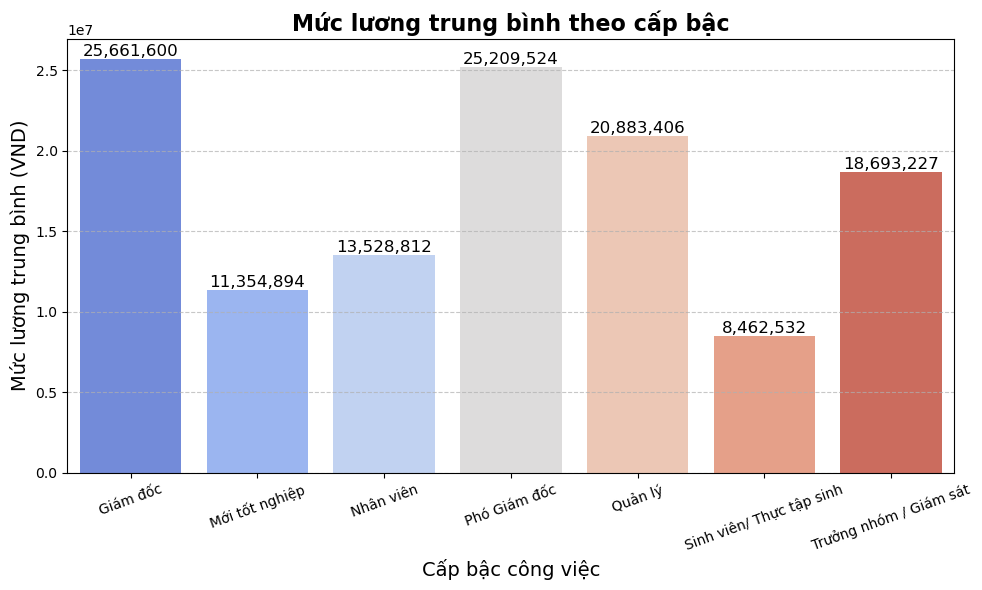

In [17]:
# Mức luong trung bình theo cấp bậc
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_salary_job_level,
    x='Job Level',
    y='Average_Salary',
    hue='Job Level',
    palette='coolwarm',
    dodge=False
)

plt.legend([], [], frameon=False)
plt.title('Mức lương trung bình theo cấp bậc', fontsize=16, weight='bold')
plt.xlabel('Cấp bậc công việc', fontsize=14)
plt.xticks(rotation=20)
plt.ylabel('Mức lương trung bình (VND)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm giá trị mức lương trên mỗi thanh
for index, value in enumerate(avg_salary_job_level['Average_Salary']):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

Nhận xét:

#### 1.3 Câu hỏi 3 <a id="ii1c"></a>

Kinh nghiệm và cấp bậc có tác động như thế nào đến mức lương?

In [18]:
# Tính hệ số tương quan giữa kinh nghiệm và mức lương
correlation = df_salary_defined[['Experience', 'Salary']].corr()
print(correlation)

# Tính mức lương trung bình theo kinh nghiệm và cấp bậc
avg_salary_experience = df_salary_defined.groupby('Experience')['Salary'].mean().reset_index()
avg_salary_job_level_experience = df_salary_defined.groupby(['Job Level', 'Experience'])['Salary'].mean().reset_index()

print(avg_salary_experience)
print(avg_salary_job_level_experience)

            Experience    Salary
Experience    1.000000  0.524443
Salary        0.524443  1.000000
    Experience        Salary
0            0  1.157908e+07
1            1  1.285544e+07
2            2  1.616629e+07
3            3  1.938179e+07
4            4  2.103878e+07
5            5  2.194834e+07
6            6  2.628571e+07
7            7  2.331250e+07
8            8  2.516667e+07
9           10  2.506667e+07
10          15  2.500000e+07
11          30  3.000000e+07
                   Job Level  Experience        Salary
0                   Giám đốc           1  2.358571e+07
1                   Giám đốc           2  2.563000e+07
2                   Giám đốc           3  2.502667e+07
3                   Giám đốc           4  2.500000e+07
4                   Giám đốc           5  2.640192e+07
5             Mới tốt nghiệp           0  1.135489e+07
6                  Nhân viên           0  1.206941e+07
7                  Nhân viên           1  1.256925e+07
8                  Nhân viên 

Vì hệ số tương quan giữa yếu tố kinh nghiệm và mức lương cao (0.52) nên tiến hành trực quan hóa

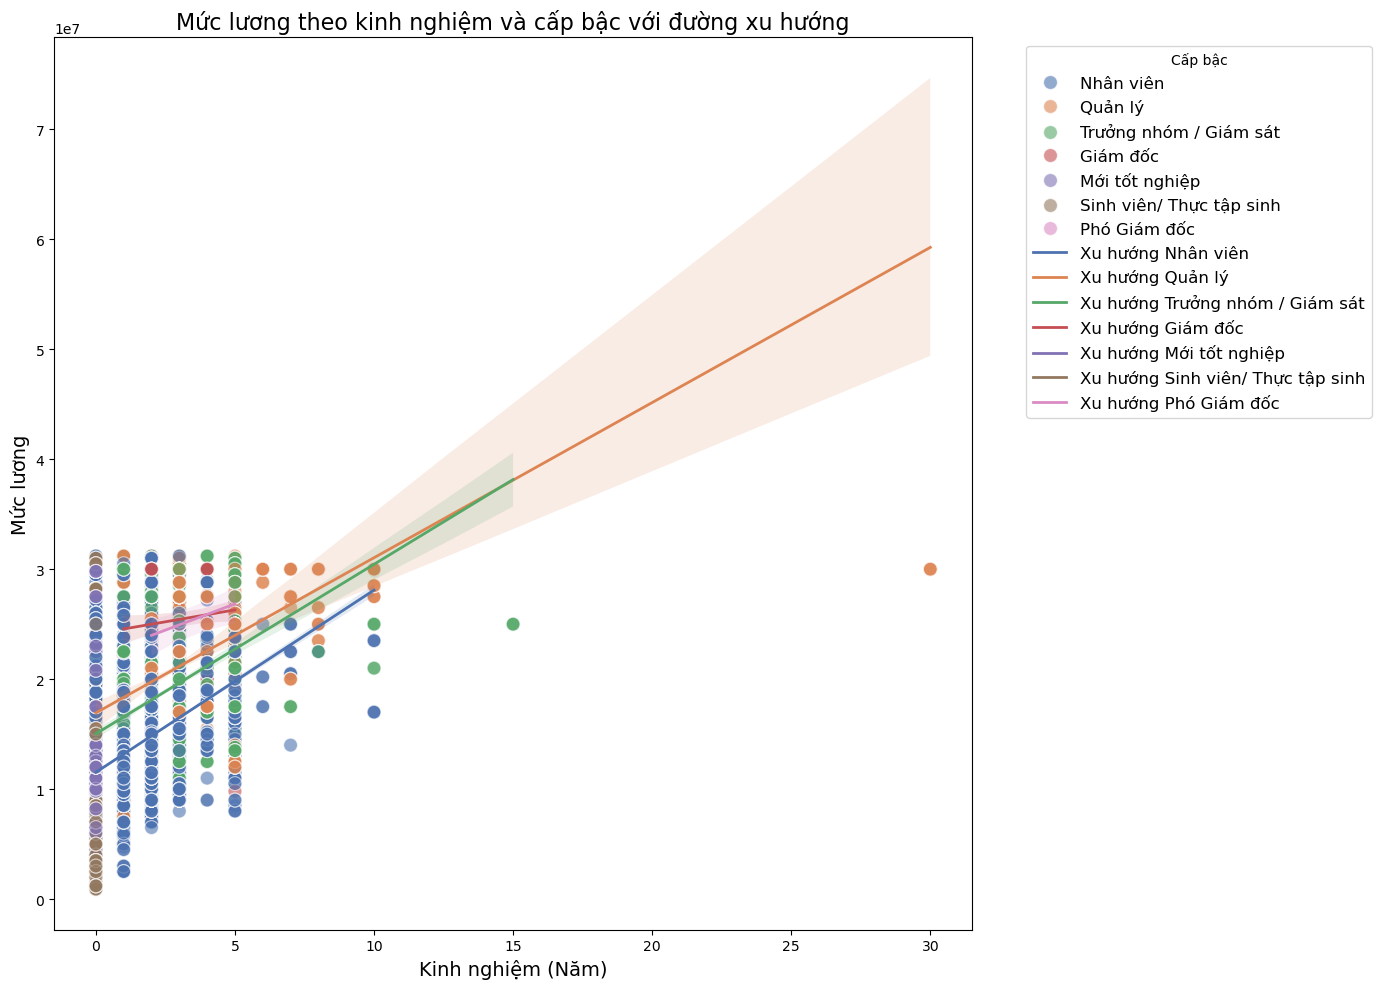

In [19]:
plt.figure(figsize=(14,10))

# Vẽ các điểm dữ liệu
sns.scatterplot(
    data=df_salary_defined,
    x='Experience',
    y='Salary',
    hue='Job Level',
    palette='deep',
    alpha=0.6,
    edgecolor='w',
    s=100
)

# Thêm đường xu hướng cho từng cấp bậc
job_levels = df_salary_defined['Job Level'].unique()
for level in job_levels:
    subset = df_salary_defined[df_salary_defined['Job Level'] == level]
    sns.regplot(
        data=subset,
        x='Experience',
        y='Salary',
        scatter=False,
        label=f'Xu hướng {level}',
        color=sns.color_palette('deep')[list(job_levels).index(level)],
        line_kws={'linewidth':2}
    )

plt.title('Mức lương theo kinh nghiệm và cấp bậc với đường xu hướng', fontsize=16)
plt.xlabel('Kinh nghiệm (Năm)', fontsize=14)
plt.ylabel('Mức lương', fontsize=14)
plt.legend(title='Cấp bậc', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

Nhận xét: Biểu đồ phân tán cho thấy mối quan hệ giữa kinh nghiệm làm việc và mức lương, phân biệt theo cấp bậc. Các cấp bậc cao hơn có xu hướng nhận mức lương cao hơn và tăng theo kinh nghiệm.

#### 1.4 Câu hỏi 4 <a id="ii1d"></a>

Liệu có bằng ngoại ngữ sẽ giúp ta cả thiện mức lương trong công việc? Phải chăng người có trình độ học vấn khác nhau sẽ nhận được mức lương khác nhau?

In [20]:
# Định nghĩa lại mapping cho Education Levels
education_mapping = {
    0: 'Không xác định',
    1: 'Trung học',
    2: 'Trung cấp',
    3: 'Cao đẳng/College',
    4: 'Đại học/Bachelor’s degree/University',
    5: 'Sau đại học/Master’s degree/PHD'
}

# Áp dụng mapping
df_salary_defined['Education Levels'] = df_salary_defined['Education Levels'].map(education_mapping)

In [21]:
# Tính mức lương trung bình theo trình độ học vấn
avg_salary_education = df_salary_defined.groupby('Education Levels')['Salary'].mean().reset_index()
print(avg_salary_education)

                       Education Levels        Salary
0                      Cao đẳng/College  1.408722e+07
1                        Không xác định  1.213406e+07
2                             Trung cấp  1.214095e+07
3                             Trung học  1.128991e+07
4  Đại học/Bachelor’s degree/University  1.698858e+07


In [22]:
# Tính mức lương trung bình theo yêu cầu ngôn ngữ
avg_salary_language = df_salary_defined.groupby('Language requirement')['Salary'].mean().reset_index()
print(avg_salary_language)

   Language requirement        Salary
0                     0  1.392492e+07
1                     1  1.570679e+07


Trực quan hóa

<Axes: xlabel='Language requirement', ylabel='Salary'>

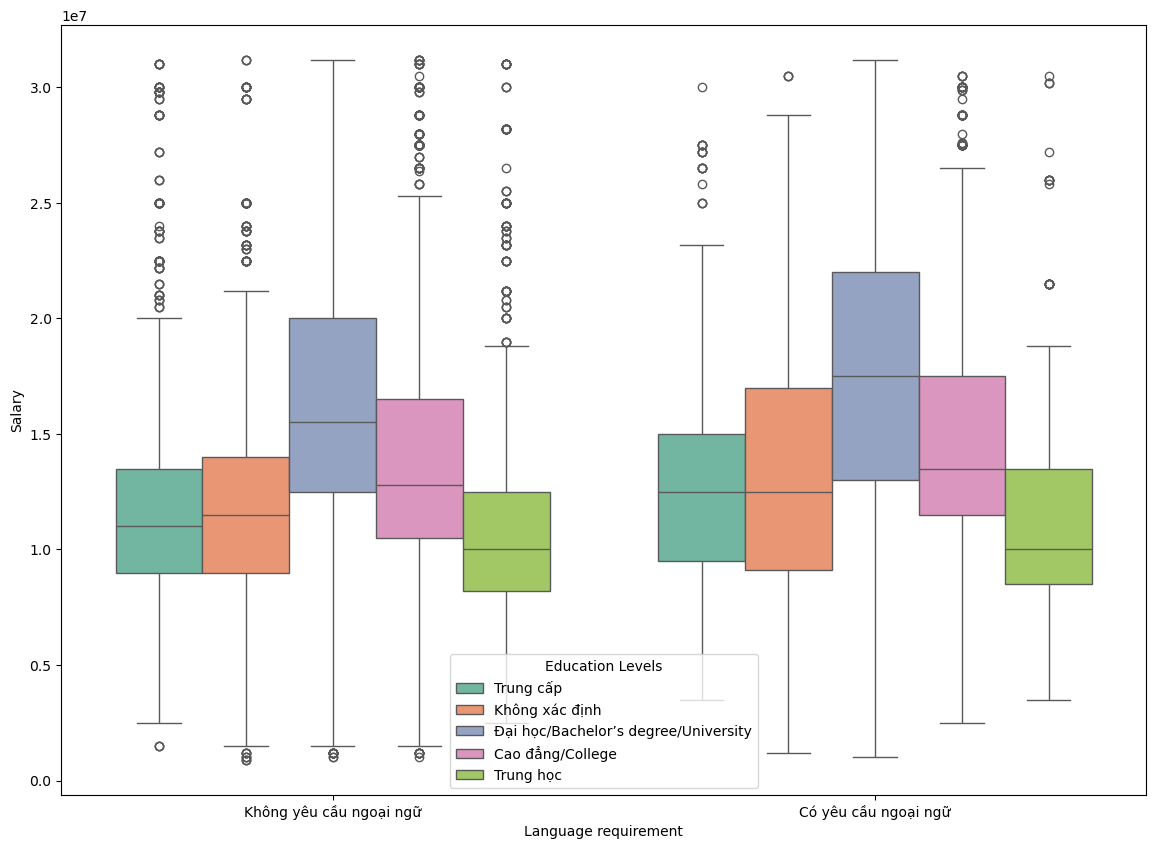

In [23]:
# Biểu đồ hộp phân phối mức lương theo Language Requirement và Education Levels
df_salary_defined['Language requirement'] = df_salary_defined['Language requirement'].map({0: "Không yêu cầu ngoại ngữ", 1: "Có yêu cầu ngoại ngữ"})

plt.figure(figsize=(14, 10))
sns.boxplot(
    data=df_salary_defined,
    x='Language requirement',
    y='Salary',
    hue='Education Levels',
    palette='Set2'
)

Nhận xét:

### 2. Vấn đề 2: Xu hướng tuyển dụng <a id="ii2"></a>

Phân tích xu hướng tuyển dụng theo thời gian và địa điểm

#### 2.1 Câu hỏi 1 <a id="ii2a"></a>

Số Lượng vị trí tuyển dụng trong 3 tháng cuối năm 2024 có xu hướng thay đổi như thế nào?

In [24]:
# Thời gian tuyển dụng
df['Recruitment Duration'] = df['Deadline_day'] - df['Update Date_day']

Ở đây chỉ xét 2 tháng vừa qua là tháng 10 và 11 vì nội dung các bài đăng tải trên trang web chỉ hiển thị trong phạm vi các tháng từ ngày 21/10 đến 4/12 (tức trong 3 tháng gần nhất) -> tùy vào thời điểm thu thập dữ liệu mà khoảng thời gian có thể thay đổi

In [25]:
# Đếm số lượng công việc theo vùng
location_trends = df.groupby(['Region'], observed=True)['Job Name'].count().reset_index(name='Job Count') 

# Chỉ lấy các ngày trong tháng 10
october_data = df[df['Update Date_month'] == 10]
# Tính tổng số vị trí tuyển dụng theo ngày trong tháng 10 vừa qua
monthly_10_trends = october_data.groupby('Update Date_day')['Job Name'].count().reset_index(name='Job Count')

# Tương tự cho tháng 11
november_data = df[df['Update Date_month'] == 11]
monthly_11_trends = november_data.groupby('Update Date_day')['Job Name'].count().reset_index(name='Job Count')

# Tương tụ cho tháng 12
december_data = df[df['Update Date_month'] == 12]
monthly_12_trends = december_data.groupby('Update Date_day')['Job Name'].count().reset_index(name='Job Count')

Trực quan hóa

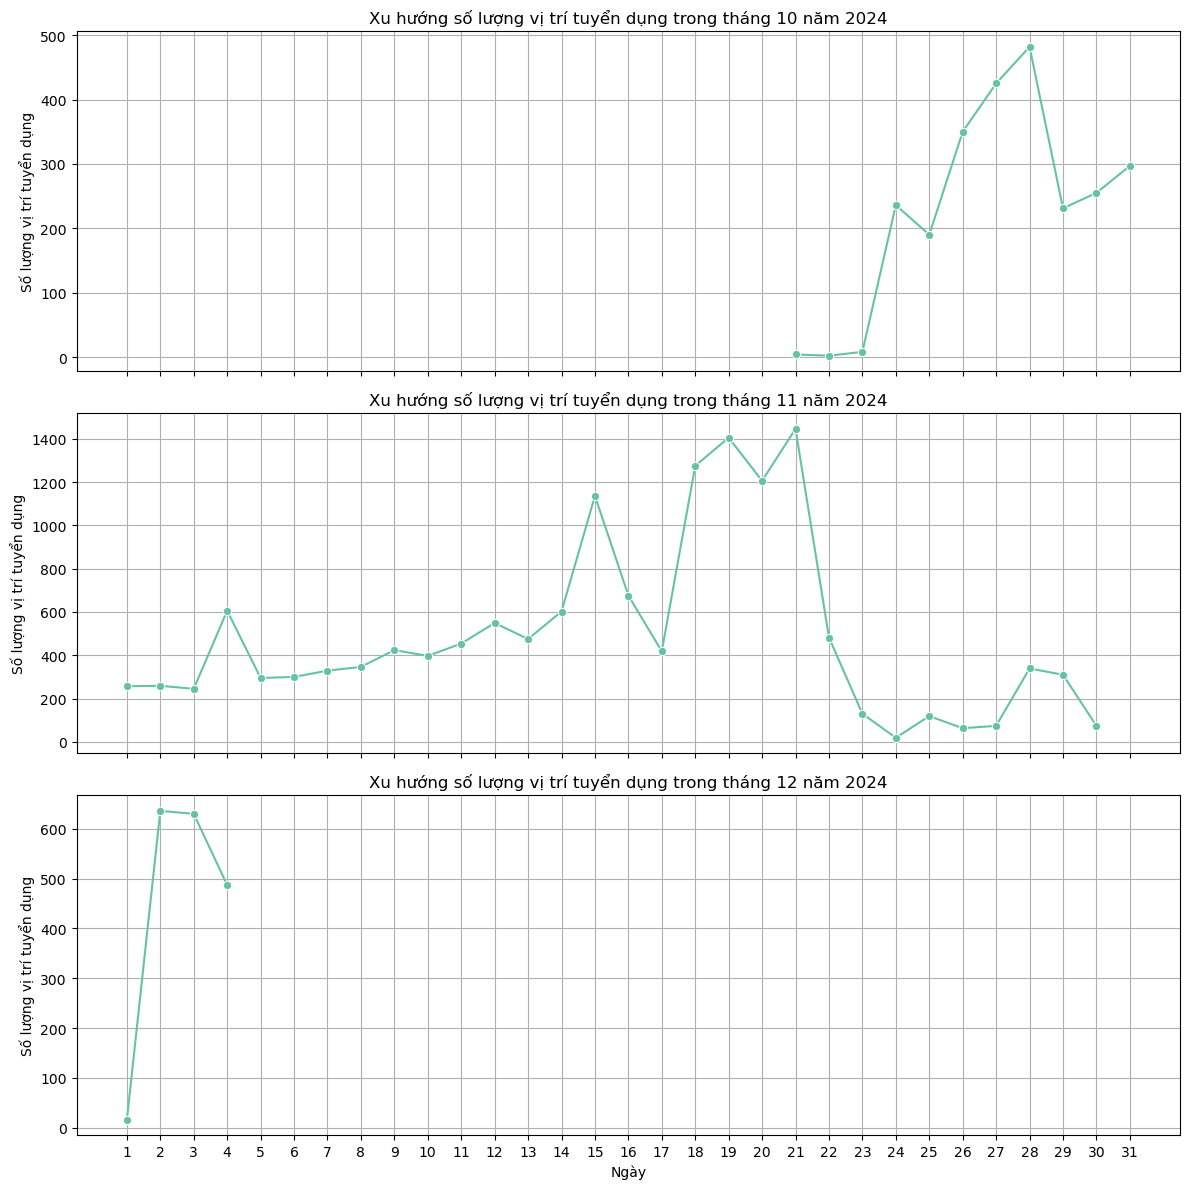

In [26]:
# Biểu đồ đường cho xu hướng theo thời gian
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Biểu đồ tháng 10
sns.lineplot(ax=axes[0], data=monthly_10_trends, x='Update Date_day', y='Job Count', marker='o')
axes[0].set_title('Xu hướng số lượng vị trí tuyển dụng trong tháng 10 năm 2024')
axes[0].set_xlabel('Ngày')
axes[0].set_ylabel('Số lượng vị trí tuyển dụng')
axes[0].set_xticks(range(1, 32))
axes[0].grid(True)

# Biểu đồ tháng 11
sns.lineplot(ax=axes[1], data=monthly_11_trends, x='Update Date_day', y='Job Count', marker='o')
axes[1].set_title('Xu hướng số lượng vị trí tuyển dụng trong tháng 11 năm 2024')
axes[1].set_xlabel('Ngày')
axes[1].set_ylabel('Số lượng vị trí tuyển dụng')
axes[1].set_xticks(range(1, 31))
axes[1].grid(True)

# Biểu đồ tháng 12
sns.lineplot(ax=axes[2], data=monthly_12_trends, x='Update Date_day', y='Job Count', marker='o')
axes[2].set_title('Xu hướng số lượng vị trí tuyển dụng trong tháng 12 năm 2024')
axes[2].set_xlabel('Ngày')
axes[2].set_ylabel('Số lượng vị trí tuyển dụng')
axes[2].set_xticks(range(1, 32))
axes[2].grid(True)

plt.tight_layout()
plt.show()

Biểu đồ đường thể hiện số lượng tuyển dụng hàng tháng, giúp nhận diện các tháng có nhu cầu tuyển dụng cao hoặc thấp.

#### 2.2 Câu hỏi 2 <a id="ii2b"></a>

Sự phân bố vị trí tuyển dụng theo địa điểm trong các thành phố lớn và các tỉnh lẻ như thế nào?

In [27]:
# Định nghĩa danh sách thành phố lớn
large_cities = ['Hà Nội', 'Thành phố Hồ Chí Minh']

# Phân loại địa điểm
df['Location Type'] = df['Location'].apply(lambda x: 'Thành phố lớn' if x in large_cities else 'Tỉnh lẻ')

# Tính tổng số vị trí tuyển dụng theo loại địa điểm và địa điểm cụ thể
location_trends = df.groupby(['Location Type'])['Job Name'].count().reset_index(name='Job Count')

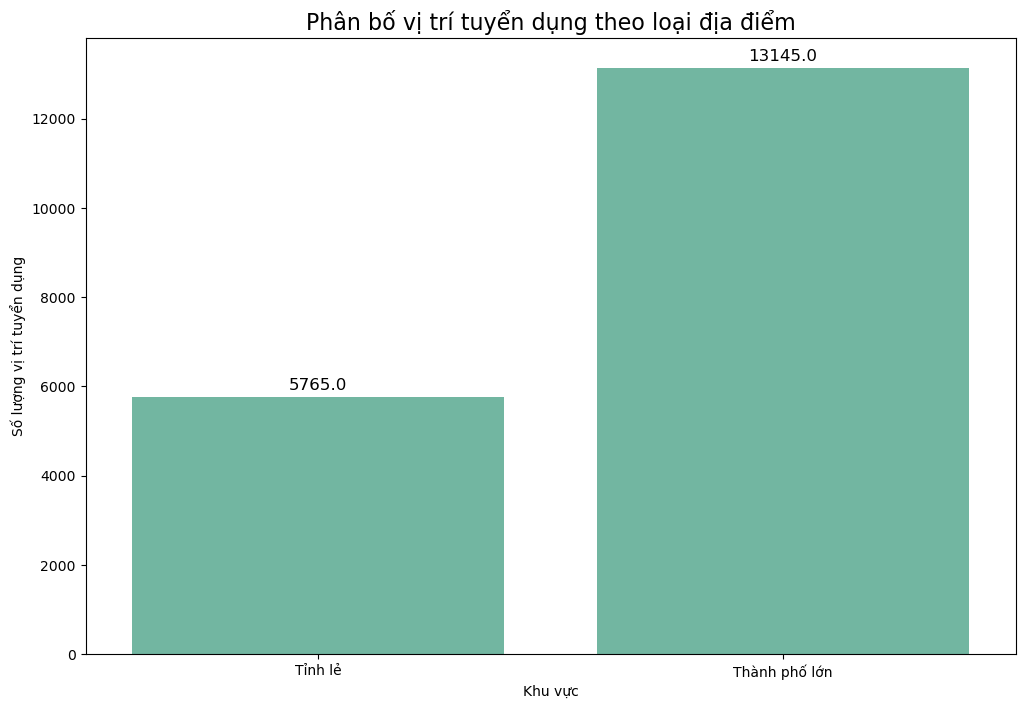

In [28]:
# Biểu đồ cột nhóm cho phân bố theo vùng
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Location Type')
plt.title('Phân bố vị trí tuyển dụng theo loại địa điểm', fontsize=16)
plt.xlabel('Khu vực')
plt.ylabel('Số lượng vị trí tuyển dụng')

# Thêm số đếm trên đầu mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

 Biểu đồ thanh nhóm hoặc bản đồ nhiệt (heatmap) thể hiện sự phân bố tuyển dụng theo địa điểm, phân biệt giữa thành phố lớn và tỉnh lẻ.

### 3. Vấn đề 3: Welfare (Phúc lợi) <a id="ii3"></a>

Phân tích các gói phúc lợi và mối quan hệ với hình thức tuyển dụng

In [29]:
# Xóa các dòng mang giá trị 'Not specified' trong cột 'Employment Type'
df_welfare = df[df['Welfare'] != 'not_specified']

#### 3.1 Câu hỏi 1 <a id="ii3a"></a>

Các gói phúc lợi nào được cung cấp phổ biến nhất trong các vị trí tuyển dụng?

In [30]:
# Tách các phúc lợi bằng dấu phẩy thành danh sách
df_welfare.loc[:, 'Welfare'] = df_welfare['Welfare'].str.split(',')

# Chuyển đổi các danh sách thành các dòng riêng biệt
df_welfare = df_welfare.explode('Welfare')

# Loại bỏ khoảng trắng dư thừa (nếu có) và đảm bảo các tên phúc lợi không có lỗi chính tả
df_welfare['Welfare'] = df_welfare['Welfare'].str.strip()

# Tính tổng số lần mỗi gói phúc lợi xuất hiện
welfare_counts = df_welfare['Welfare'].value_counts().reset_index()
welfare_counts.columns = ['Welfare', 'Count']
print(welfare_counts)

                   Welfare  Count
0                insurance  17769
1                    bonus  17726
2                 training  17681
3          salary_increase  17025
4                   travel  15403
5               healthcare  15402
6             annual_leave  13843
7                allowance  11763
8                  uniform   8672
9   business_trip_expenses   8175
10                  laptop   6310
11     allowance thâm niên   5261
12             sports_club   3003
13         overseas_travel   2116
14         shuttle_service   2044


Trực quan hóa

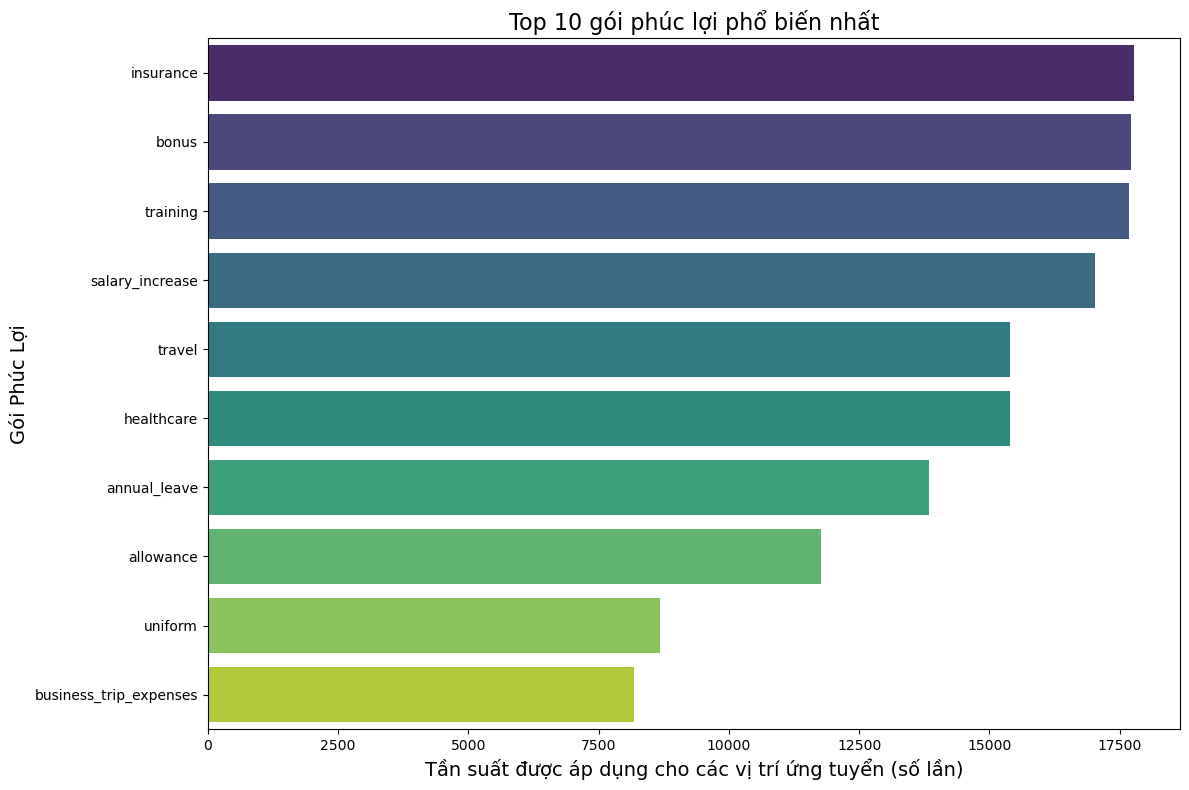

In [31]:
# Chọn Top 10 phúc lợi phổ biến nhất 
top_n = 10
top_welfare = welfare_counts.head(top_n)

plt.figure(figsize=(12,8))
sns.barplot(
    data=top_welfare, 
    x='Count', 
    y='Welfare', 
    hue='Welfare',
    palette='viridis',
    dodge=False
)

plt.title(f'Top {top_n} gói phúc lợi phổ biến nhất', fontsize=16)
plt.xlabel('Tần suất được áp dụng cho các vị trí ứng tuyển (số lần)', fontsize=14)
plt.ylabel('Gói Phúc Lợi', fontsize=14)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Nhận xét:

#### 3.2 Câu hỏi 2 <a id="ii3b"></a>

Liệu phụ thuộc vào từng loại hình công việc mà các gói phúc lợi có thể khác nhau? Mối quan hệ giữa 2 đặc trưng này là gì?

In [32]:
# Tính tần suất các gói phúc lợi theo Employment Type
welfare_by_employment = df_welfare.groupby(['Employment Type', 'Welfare']).size().reset_index(name='Count')
print(welfare_by_employment)

# Tính tần suất và tỉ lệ
welfare_by_employment['Total'] = welfare_by_employment.groupby('Employment Type')['Count'].transform('sum')
welfare_by_employment['Percentage'] = welfare_by_employment['Count'] / welfare_by_employment['Total']
print(welfare_by_employment)

                     Employment Type                 Welfare  Count
0                         Internship               allowance    249
1                         Internship     allowance thâm niên     29
2                         Internship            annual_leave     86
3                         Internship                   bonus    254
4                         Internship  business_trip_expenses     78
..                               ...                     ...    ...
203  Seasonal/Freelance , Internship                  laptop      1
204  Seasonal/Freelance , Internship         salary_increase      1
205  Seasonal/Freelance , Internship                training      2
206  Seasonal/Freelance , Internship                  travel      1
207  Seasonal/Freelance , Internship                 uniform      1

[208 rows x 3 columns]
                     Employment Type                 Welfare  Count  Total  \
0                         Internship               allowance    249   1970   
1   

pivot DataFrame sao cho Employment Type làm hàng, Welfare làm cột, và Percentage làm giá trị hiển thị trong Heatmap.

In [33]:
# Pivot dữ liệu để tạo định dạng phù hợp cho Heatmap
pivot_table = welfare_by_employment.pivot(index='Employment Type', columns='Welfare', values='Percentage')

# Thay thế NaN bằng 0
pivot_table = pivot_table.fillna(0)

# Kiểm tra pivot_table
print(pivot_table)

Welfare                                             allowance  \
Employment Type                                                 
Internship                                           0.126396   
Official                                             0.071759   
Official, Internship                                 0.088757   
Official, Part-time                                  0.077393   
Official, Part-time, Internship                      0.090909   
Official, Part-time, Seasonal/Freelance              0.106061   
Official, Part-time, Seasonal/Freelance , Inter...   0.075000   
Official, Seasonal/Freelance                         0.076305   
Official, Seasonal/Freelance , Internship            0.108108   
Part-time                                            0.065217   
Part-time, Internship                                0.102410   
Part-time, Seasonal/Freelance                        0.050228   
Part-time, Seasonal/Freelance , Internship           0.044118   
Seasonal/Freelance       

Trực quan hóa

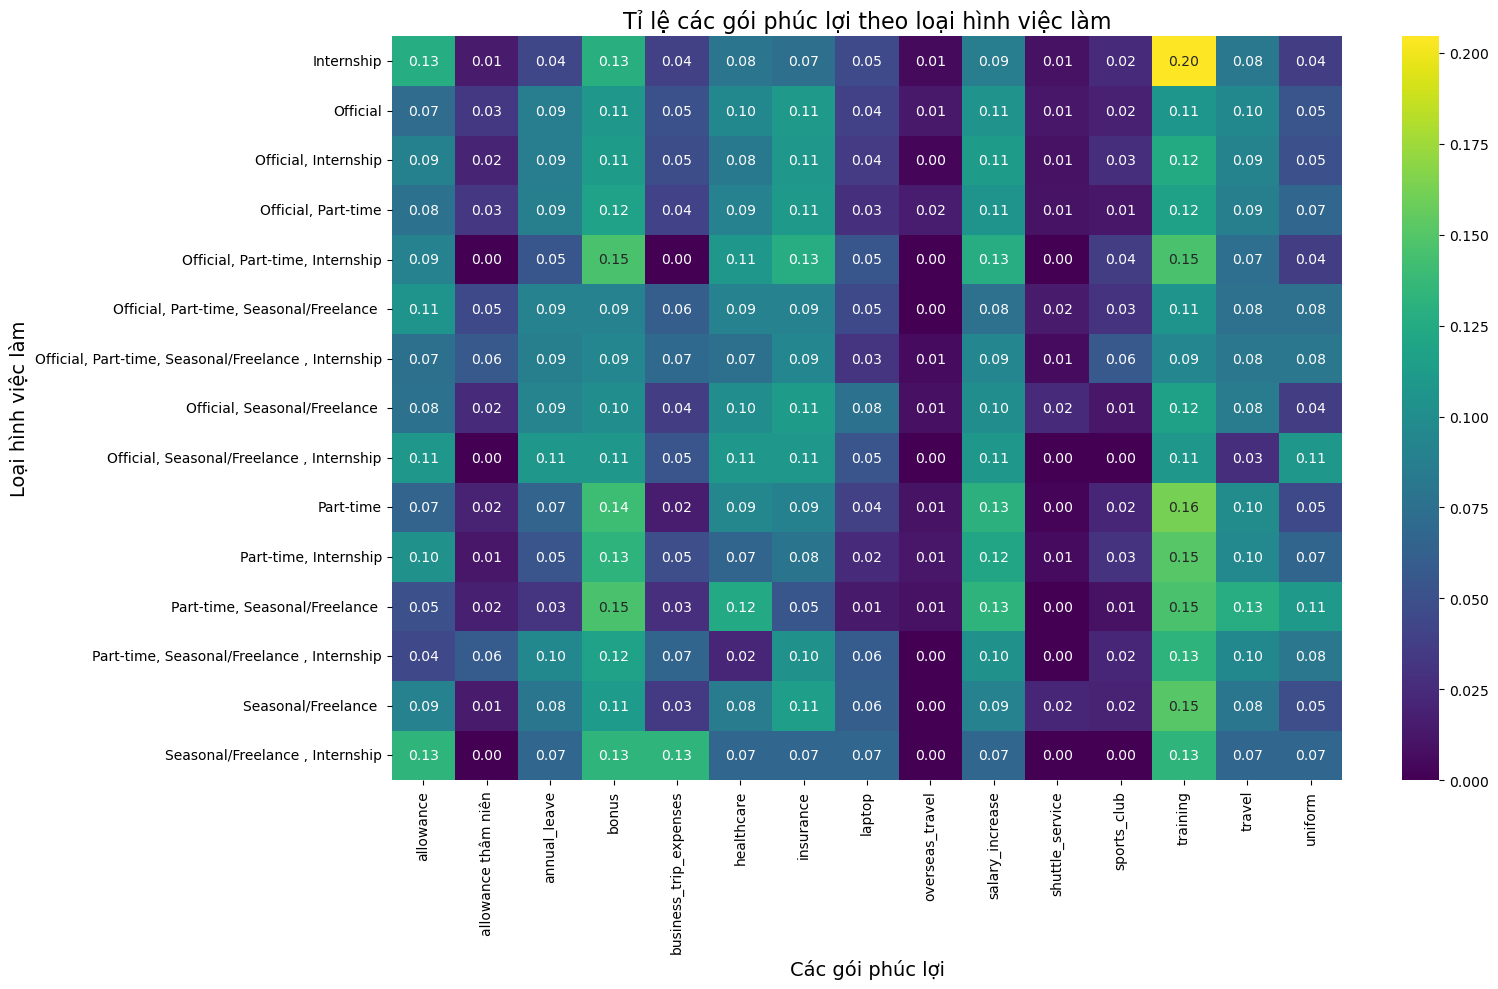

In [34]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    data=pivot_table,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)
plt.title('Tỉ lệ các gói phúc lợi theo loại hình việc làm', fontsize=16)
plt.xlabel('Các gói phúc lợi', fontsize=14)
plt.ylabel('Loại hình việc làm', fontsize=14)
plt.tight_layout()
plt.show()

Nhận xét:

#### 3.3 Câu hỏi 3 <a id="ii3c"></a>

Sự đa dạng của các gói phúc lợi được cung cấp bởi các ngành nghề khác nhau được thể hiện như thế nào?

In [35]:
# Tính đa dạng các gói phúc lợi theo ngành nghề
# Mã hóa các gói phúc lợi thành các cột nhị phân
welfare_encoded = pd.get_dummies(df_welfare['Welfare'])

# Tính đa dạng các gói phúc lợi theo ngành nghề
welfare_diversity = welfare_encoded.groupby(df_welfare['Industry']).sum()
welfare_diversity['Total Welfare'] = (welfare_diversity > 0).sum(axis=1)
welfare_diversity_sorted = welfare_diversity.sort_values(by='Total Welfare', ascending=False)
print(welfare_diversity_sorted.head())

                                                    allowance  \
Industry                                                        
accounting_auditing                                       233   
administrative_secretarial,human_resources                 66   
marketing,retail_wholesale,sales_business                 213   
marketing,retail_wholesale,textile_leather_fashion          8   
administrative_secretarial,executive_management...          1   

                                                    allowance thâm niên  \
Industry                                                                  
accounting_auditing                                                 115   
administrative_secretarial,human_resources                           35   
marketing,retail_wholesale,sales_business                           103   
marketing,retail_wholesale,textile_leather_fashion                    4   
administrative_secretarial,executive_management...                    1   

                  

In [36]:
# Chọn Top 5 ngành nghề có đa dạng phúc lợi cao nhất
top_industries = welfare_diversity_sorted['Total Welfare'].nlargest(5).index.tolist()
welfare_selected = ['insurance', 'travel', 'bonus', 'salary_increase', 'healthcare', 
                    'allowance', 'annual_leave', 'training', 'business_trip_expenses', 
                    'overseas_travel', 'shuttle_service', 'uniform', 'sports_club']

Trực quan hóa

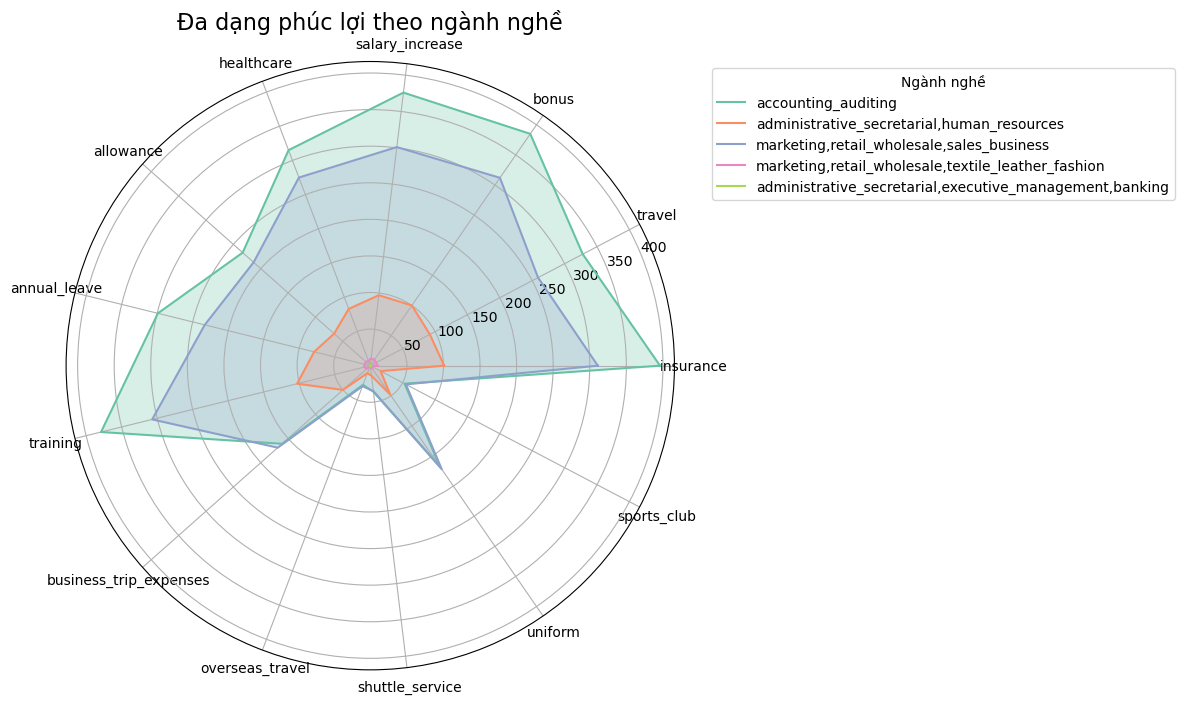

In [37]:
# Vẽ radar chart cho đa dạng phúc lợi theo ngành nghề
plt.figure(figsize=(12, 12))
for industry in top_industries:
    data = welfare_diversity_sorted.loc[industry, welfare_selected]
    angles = np.linspace(0, 2 * np.pi, len(welfare_selected), endpoint=False).tolist()
    data = pd.concat([data, data.iloc[[0]]])
    angles += angles[:1]
    plt.polar(angles, data, label=industry)
    plt.fill(angles, data, alpha=0.25)

plt.xticks(angles[:-1], welfare_selected)
plt.title('Đa dạng phúc lợi theo ngành nghề', fontsize=16)
plt.legend(title='Ngành nghề', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Nhận xét

#### 3.4 Câu hỏi 4 <a id="ii3d"></a>

Mức lương có phụ thuộc vào các gói phúc lợi không?

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

# Tạo biến đếm số lượng phúc lợi
df_welfare_salary = df_salary_defined[df_salary_defined['Welfare'] != 'not_specified'].copy()

# Reset chỉ mục để đảm bảo tính đồng bộ
df_welfare_salary.reset_index(drop=True, inplace=True)

# Khởi tạo MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Mã hóa các gói phúc lợi thành các cột nhị phân
welfare_encoded = pd.DataFrame(
    mlb.fit_transform(df_welfare_salary['Welfare']),
    columns=mlb.classes_,
    index=df_welfare_salary.index
)

# Kiểm tra các cột phúc lợi đã mã hóa
print(welfare_encoded.head())

# Tạo cột 'Total Welfare Count' để lưu tổng số lượng phúc lợi
df_welfare_salary['Total Welfare Count'] = welfare_encoded.sum(axis=1)

      ,  _  a  b  c  e  f  g  h  ...  r  s  t  u  v  w  x  y  â  ê
0  1  1  1  1  1  1  1  1  1  1  ...  1  1  1  1  1  1  0  1  0  0
1  1  1  1  1  1  1  1  1  1  1  ...  1  1  1  1  1  1  0  1  0  0
2  1  1  1  1  1  1  1  1  1  1  ...  1  1  1  1  1  1  1  1  1  1
3  1  1  1  1  1  1  1  0  1  1  ...  1  1  1  1  1  1  0  1  1  1
4  1  1  1  1  1  1  1  0  1  1  ...  1  1  1  1  1  1  0  1  1  1

[5 rows x 26 columns]


In [39]:
# Tính hệ số tương quan
correlation = df_welfare_salary[['Total Welfare Count', 'Salary']].corr()
print(correlation)

                     Total Welfare Count    Salary
Total Welfare Count             1.000000  0.079217
Salary                          0.079217  1.000000


Trực quan hóa

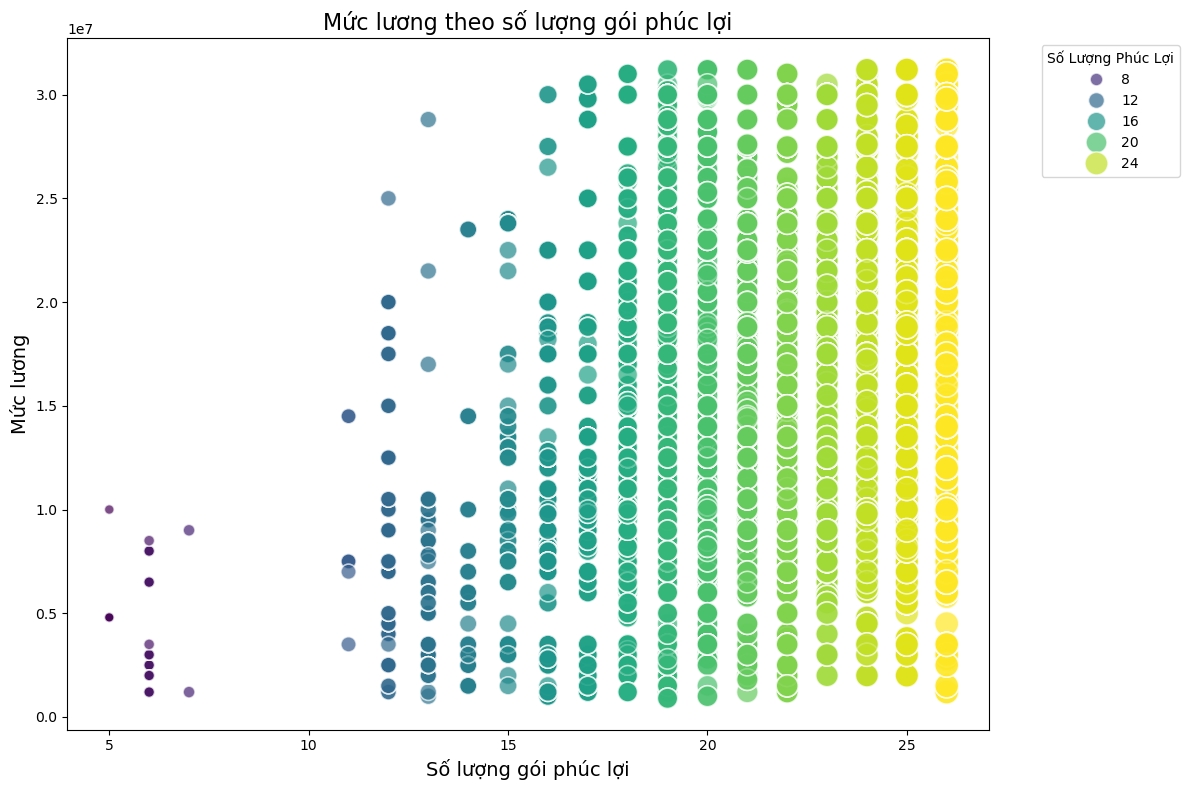

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_welfare_salary, 
    x='Total Welfare Count', 
    y='Salary', 
    hue='Total Welfare Count', 
    palette='viridis', 
    size='Total Welfare Count', 
    sizes=(50, 300), 
    alpha=0.7
)
plt.title('Mức lương theo số lượng gói phúc lợi', fontsize=16)
plt.xlabel('Số lượng gói phúc lợi', fontsize=14)
plt.ylabel('Mức lương', fontsize=14)
plt.legend(title='Số Lượng Phúc Lợi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

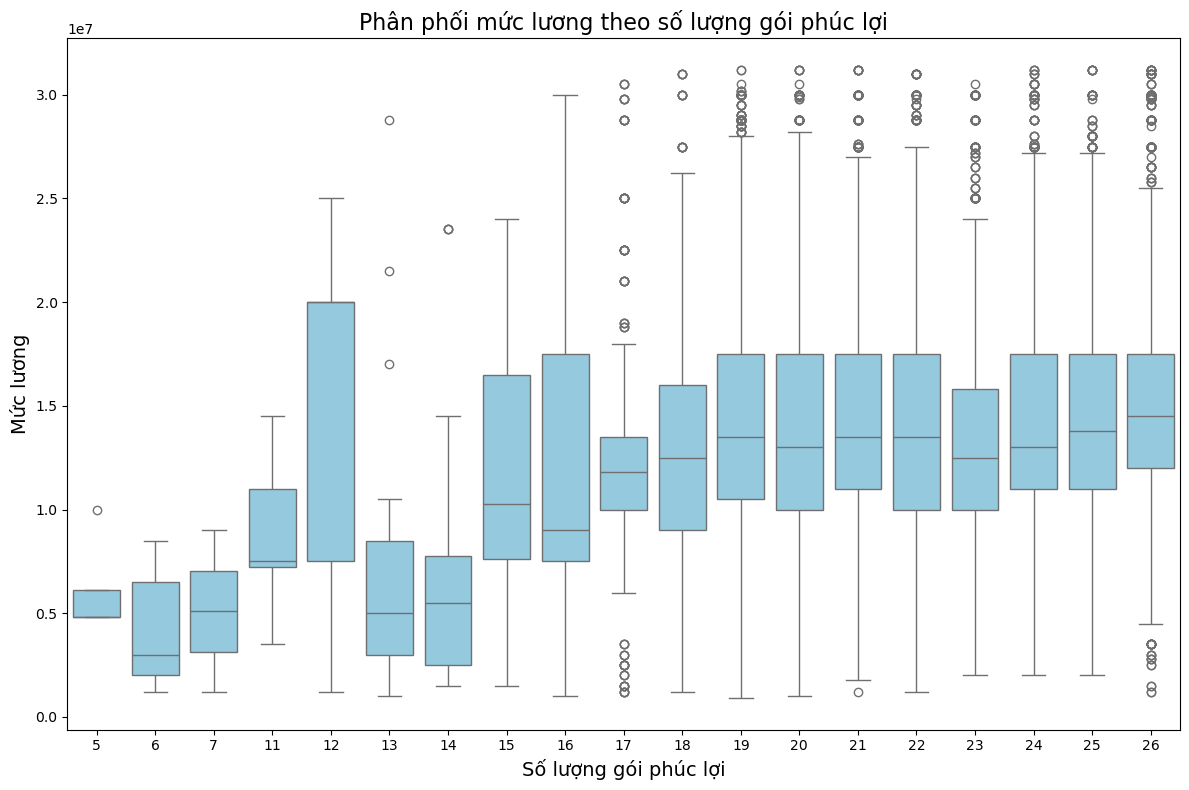

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(
    x='Total Welfare Count', 
    y='Salary', 
    data=df_welfare_salary, 
    color='skyblue'
)
plt.title('Phân phối mức lương theo số lượng gói phúc lợi', fontsize=16)
plt.xlabel('Số lượng gói phúc lợi', fontsize=14)
plt.ylabel('Mức lương', fontsize=14)
plt.tight_layout()
plt.show()

Nhận xét

## Tài liệu tham khảo  <a id="tl"></a>